# PLQY_all

_by Felix Eickemeyer_

Evaluation of all absolute PLQY data.

In [14]:
import os
from os import getcwd, listdir
import shutil
import pandas as pd
import matplotlib.pyplot as plt

import thot
from thot import ThotProject
from importlib import reload

from FTE_analysis_libraries import General as gen
from FTE_analysis_libraries import PLQY as lqy
from FTE_analysis_libraries import Spectrum as spc

In [2]:
# Initializes Thot project
db = ThotProject( dev_root = 'PLQY_results' )

In [3]:
samples = db.find_assets({'type' : 'absolute PL spectrum'})
samples.sort( key = lambda asset: asset.name.lower() )

if db.dev_mode():
    for idx, sample in enumerate(samples):
        print(f'{idx:2}: {sample.name}')    

 0: htl-pero-peai-c60_2_absolute PL spectrum


In [4]:
# Select samples and change order
do_this_step = False
if do_this_step and db.dev_mode():
    order = [ 1, 2, 0 ]
    samples_new = [samples[order[idx]] for idx in range(len(order))]
    for idx, sample in enumerate(samples_new):
        print(f'{idx:2}: {sample.name}')
    
    samples = samples_new
    do_this_step = False  # reset local do this step

In [5]:
def load_spectrum(asset):
    return spc.PEL_spectrum.load(os.path.dirname(asset.file), FN = os.path.basename(asset.file)+'.csv', take_quants_and_units_from_file = True)


sa = []
for idx, sample in enumerate(samples):
    sa.append(load_spectrum(sample))
    
    if db.dev_mode():
        print(f'{idx:2}: {sample.name}')

 0: htl-pero-peai-c60_2_absolute PL spectrum


htl-pero-peai-c60_2: PLQY = 3.1e-03, PF = 5.3e+18 1/(s m2)


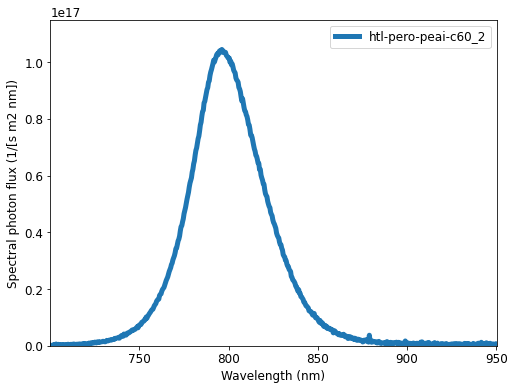

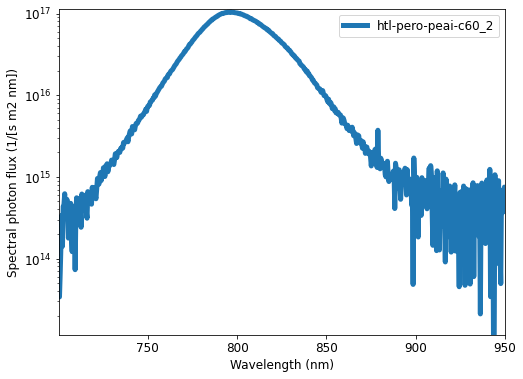

In [7]:
allPL = spc.PEL_spectra(sa)
allPL.names_to_label()

new_labels = []
for idx in range(len(samples)):
    allPL.sa[idx].plotstyle = dict(color = gen.colors[idx], linewidth = 5, linestyle = '-')
    sm = samples[idx].metadata
    PLQY = sm['PLQY']
    s_name = samples[idx].name.split('_absolute')[0]
    new_labels.append(s_name)
    PF = allPL.sa[idx].photonflux(start = 700, stop = 900)
    print(f'{s_name}: PLQY = {PLQY:.1e}, PF = {PF:.1e} 1/(s m2)')

change_plotstyle = True
if change_plotstyle:
    allPL.sa[0].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    #allPL.sa[1].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    #allPL.sa[2].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    #allPL.sa[3].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    #allPL.sa[4].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    #allPL.sa[5].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    #allPL.sa[6].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    #allPL.sa[7].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    #allPL.sa[8].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[9].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[10].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[11].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[12].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[13].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[14].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')

#allPL.label(['s1', 's2', 's3', 's4', 's6'])
allPL.label(new_labels)
all_graph = allPL.plot(bottom = 0, plotstyle = 'individual', figsize = (8, 6), return_fig = True, show_plot = False)
allPL.plot(yscale = 'log', divisor = 1e3, plotstyle = 'individual', figsize = (8, 6))
#lqy.add_graph(db, 'all_htl-per-345_without_and_with_C60.png', all_graph)
lqy.add_graph(db, 'all_absolute_PL_spectra_.png', all_graph)
if not db.dev_mode():
    plt.close( all_graph )

In [11]:
names = []
A_arr = []
PLQY_arr = []
peak_arr = []
Eg_arr = []
Vsq_arr = []
dV_arr = []
QFLS_arr = []
adj_fac_arr = []
fs_absint_fac_arr = []
for sample in samples:
    sm = sample.metadata
    names.append(sample.name.split('_absolute')[0])
    A_arr.append(sm['A'])
    PLQY_arr.append(sm['PLQY'])
    peak_arr.append(sm['Peak'])
    Eg_arr.append(sm['Eg'])
    Vsq_arr.append(sm['Vsq'])
    dV_arr.append(sm['dV'])
    QFLS_arr.append(sm['QFLS'])
    adj_fac_arr.append(sm['adj_fac'])
    fs_absint_fac_arr.append(sm['fs_absint_factor'])    

In [12]:
# Save PLQY data
do_this_step = True
if do_this_step or ( not db.dev_mode() ):

    df = pd.DataFrame({'Sample' : names, 'A' : A_arr, 'PLQY' : PLQY_arr, 'PL_peak (nm)' : peak_arr, 'Eg (eV)' : Eg_arr, 'Vsq (V)' : Vsq_arr, 'delta V (V)': dV_arr, 'QFLS/q (V)' : QFLS_arr, 'fs-inb adjustment factor' : adj_fac_arr, 'fs-absolute intensity factor' : fs_absint_fac_arr})

    directory = os.path.dirname(samples[0].file) 
    FN = 'PLQY.csv'
    # if save_ok(join(directory, FN)):
    # df.to_csv(join(directory, FN), header = True, index = False)
        
    asset_prop = dict(name = 'csv_' + FN, type = 'csv', file = FN)
    asset_filepath = db.add_asset(asset_prop)
    df.to_csv(asset_filepath, header = True, index = False)
    do_this_step = False

In [19]:
# Save all user relevant data in folder "share"

share_path = os.path.join(db.root, 'share')
try:
    os.mkdir(share_path)
except FileExistsError:
    pass

PLQY_table = db.find_asset(dict(type ='csv'))
shutil.copy(
    PLQY_table.file, 
    os.path.join(
        share_path, 
        os.path.basename(PLQY_table.file)
    )
)



'C:\\Users\\dreickem\\switchdrive\\Work\\Python\\PL\\Steady_state_PL\\thot\\PLQY_results\\share\\PLQY.csv'